# Features of GTools
GTools is a set of tools for complex urban network analysis. It mostly suplements OSMnx creating new sets of functions and making it work with iGraph to make some operations faster.

It also includes tools to add information from shapefiles on graph networks, this includes marking nodes with traffic zones and adding demographic data to nodes and edges.

Finally, it has some tools to make trip allocation from OD pairs easier.

# 1 - New formats of queries for OSM data.

The new functions to fetch city data from OSM are:
   - `graph_from_circle()`;
   - `graph_from_point()`; #with circular buffer
   - `graph_from_traffic_zones()`.

Other functions are also improved adding the option to:
   - Get graph in its dual form, with `dual` parameter;
   - Get graph as iGraph `Graph` object instead of NetworkX `MultiDiGraph`;
   - Save graph in pickle format with `save_pickle` parameter;
   - Read graphs in pickle files with `read_pickle()`;

In [1]:
import gtools as gt
import osmnx as ox

### 1.1 - Getting graphs in circular form
Standard OSMnx gets a square quem passing the functions `graph_from_address()` and `graph_from_point()`. This adds the option to get circles centered in the address with `graph_from_circle()`; or centered on a point with `graph_from_point()` with `buffer_type` set to 'circle'.

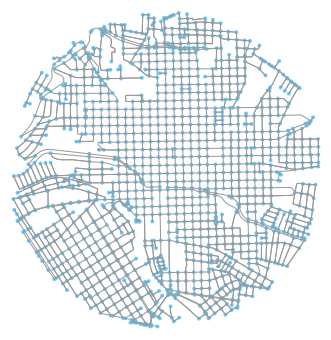

(<Figure size 453.442x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc7384d88>)

In [2]:
G = gt.graph_from_circle('São Carlos, SP, Brasil', radius=2000, network_type='drive',) #circle centered in the address
ox.plot_graph(G)

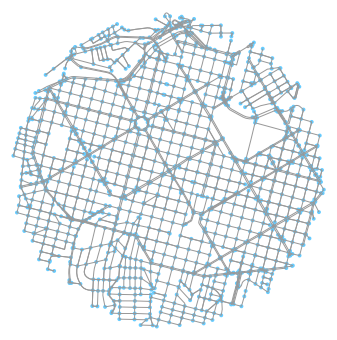

(<Figure size 454.816x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc77957c8>)

In [3]:
G = gt.graph_from_point((-19.928321, -43.941883), buffer_type='circle', buffer=2000, #circle centered in point (lat, lon)
                        network_type='drive') 
ox.plot_graph(G)

### 1.2 - Getting dual graphs
Dual graphs are graphs where the original graph's edges turn to nodes.

Dual graphs from these functions have the attribute `ang_dif` on its edges which represents the angle between the two road segments represented by the dual graph.

It also carries other attributes:
   - The edge attributes from the primal graph are carried as node attributes to the dual graph;
   - The node attributes from the primal graph are carried as node attributes to the dual graph. The value carried is the one of the first node of th edge;
   - The `x` and `y` positions of the edges are the averages of the `x` and `y` positions of the extreme nodes;
   - The graph attributes, like `crs` are carried to the dual graph. This makes the dual graph plotable with OSMnx.

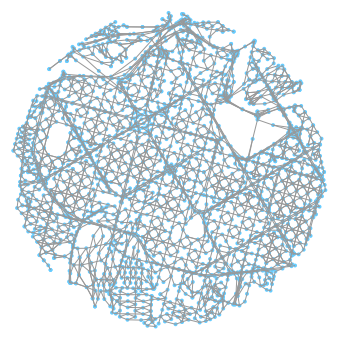

(<Figure size 457.079x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc8086d08>)

In [4]:
G = gt.graph_from_point((-19.928321, -43.941883), buffer_type='circle', buffer=2000, #circle centered in point (lat, lon)
                        network_type='drive', dual=True)
ox.plot_graph(G)

### 1.3 - The `dual` attribute works with other functions as well

Primal Graph:


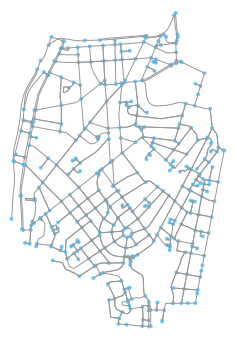

Dual Graph:


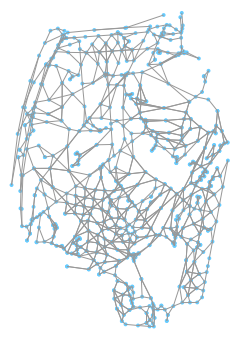

(<Figure size 325.145x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc7a1bcc8>)

In [5]:
print('Primal Graph:')
G = gt.graph_from_place("Liberdade, São Paulo, SP, Brasil", network_type='drive', dual=False)
ox.plot_graph(G)
print('Dual Graph:')
G = gt.graph_from_place("Liberdade, São Paulo, SP, Brasil", network_type='drive', dual=True)
ox.plot_graph(G)

### 1.4 - Queries from shapefiles
OD travel pairs are generally associated with traffic zones in a shapefile. Some functions allow you to get the graph contained in the traffic zones and mark the nodes with the respective Traffic Zone.

In this example we use the traffic zones of São Carlos - SP, which are contained in the folder `TZs` in the directory of this notebook

C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


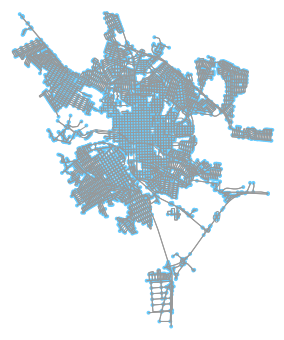

(<Figure size 386.281x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc81d8248>)

In [6]:
G = gt.graph_from_traffic_zones(shp_directory='ZTs', network_type='drive')
ox.plot_graph(G)

Some sets of traffic zones are not continuous. This leaves the graph from the city incomplete, as is the case of São Carlos. To address this problem, we can get the graph in the convex hull containing all graphs with the parameter `convex_hull`.

C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


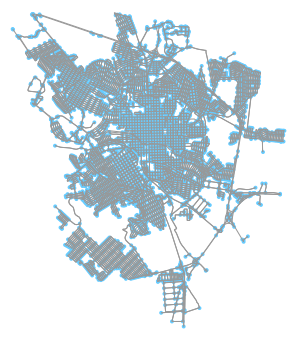

(<Figure size 403.909x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc8a3bcc8>)

In [7]:
G = gt.graph_from_traffic_zones(shp_directory='ZTs', network_type='drive', convex_hull=True)
ox.plot_graph(G)

### Marking nodes by zone
It is also possible to mark the nodes contained on each traffic zone with the traffic zone's code and save as `zone` in the graph's node attribute. The shapefile of the city have a column named "ID_REAL" wich contains the codes of the zones. Here we plot the graph with different colors for traffic zones. 

If `convex_hull` is `True`, some nodes are not contained in any zone. The nodes in black are the ones outside every traffic zone.

No convex hull


C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


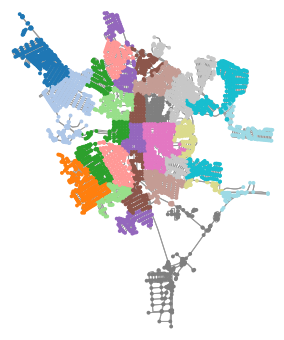

(<Figure size 386.281x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc8436988>)

In [8]:
print('No convex hull')
G= gt.graph_from_traffic_zones(shp_directory='ZTs', network_type='drive', convex_hull=False, 
                                zone_column='ID_REAL',mark_traffic_zones_to_nodes=True)
colors = ox.get_node_colors_by_attr(G,'zone', cmap='tab20', num_bins=15)
ox.plot_graph(G, node_color=colors, node_zorder=3)

Convex hull


C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\Andre\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


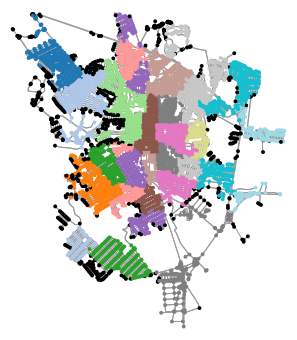

(<Figure size 403.909x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x25fc8afdd48>)

In [9]:
print('Convex hull')
G= gt.graph_from_traffic_zones(shp_directory='ZTs', network_type='drive', convex_hull=True, 
                                zone_column='ID_REAL',mark_traffic_zones_to_nodes=True)
colors = ox.get_node_colors_by_attr(G,'zone', cmap='tab20', num_bins=15)
ox.plot_graph(G, node_color=colors, node_zorder=3)